# Get all sets

In [1]:
import itertools
from collections import namedtuple

In [2]:
# card namedtuple type
Card = namedtuple('card', ['number', 'color', 'shape', 'shade'])

In [3]:
# characteristics
numbers = ['one', 'two', 'three']
colors = ['green', 'purple', 'red']
shapes = ['diamond', 'squiggle', 'oval']
shades = ['open', 'solid', 'striped']

In [4]:
# create all cards 
all_cards = {
    Card(number=number, color=color, shape=shape, shade=shade)
    for number in numbers
    for color in colors
    for shape in shapes
    for shade in shades
}

In [5]:
print(f"There are {len(all_cards)} cards in total.")

There are 81 cards in total.


In [6]:
all_cards_list = list(all_cards)
possible_sets = list(itertools.combinations(all_cards_list, 3))

In [7]:
print(f"There are {len(possible_sets):,} different 3 card combinations in total.")

There are 85,320 different 3 card combinations in total.


In [8]:
def check_if_valid(candidate_set):
    set_numbers = set()
    set_colors = set()
    set_shapes = set()
    set_shades = set()
    
    for card in candidate_set:
        set_numbers.add(card.number)
        set_colors.add(card.color)
        set_shapes.add(card.shape)
        set_shades.add(card.shade)

    set_totals = {len(set_numbers), len(set_colors), len(set_shapes), len(set_shades)}
    
    if set_totals in [{1},{3},{1,3}]:
        return True
    
    return False

In [9]:
valid_sets, invalid_sets = set(), set()

for candidate_set in possible_sets:
    (valid_sets if check_if_valid(candidate_set) else invalid_sets).add(candidate_set)

In [10]:
assert len(valid_sets)+len(invalid_sets) == len(possible_sets)

In [11]:
print(f"There are {len(valid_sets):,} valid sets and {len(invalid_sets):,} invalid sets.")

There are 1,080 valid sets and 84,240 invalid sets.


# Get training dataset for DL task 
Dataset obtained from Kaggle: https://www.kaggle.com/datasets/kwisatzhaderach/set-cards

In [12]:
import os

In [13]:
def print_folder_tree(base_dir, indent=''):
    items = os.listdir(base_dir)
    
    items = [item for item in items if os.path.isdir(os.path.join(base_dir, item))]
    
    for index, item in enumerate(items):
        item_path = os.path.join(base_dir, item)
        is_last = index == len(items) - 1
        
        if is_last:
            print(indent + '└── ' + item)
            new_indent = indent + '    '
        else:
            print(indent + '├── ' + item)
            new_indent = indent + '│   '
        
        print_folder_tree(item_path, new_indent)

In [14]:
base_dir = 'dataset'
print_folder_tree(base_dir)

├── one
│   ├── green
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   └── oval
│   │       ├── solid
│   │       ├── striped
│   │       └── open
│   ├── red
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   └── oval
│   │       ├── solid
│   │       ├── striped
│   │       └── open
│   └── purple
│       ├── diamond
│       │   ├── solid
│       │   ├── striped
│       │   └── open
│       ├── squiggle
│       │   ├── solid
│       │   ├── striped
│       │   └── open
│       └── oval
│           ├── solid
│           ├── striped
│           └── open
├── zthree
│   ├── green
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── str

# Detecting cards

In [99]:
image_path = 'test_images/test_1.png'

In [118]:
import cv2
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def detect_and_highlight_cards(image_path):
    image = cv2.imread(image_path)
    orig_image = image.copy()
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # GaussianBlur to reduce noise and improve edge detection
    
    edged = cv2.Canny(blurred, 50, 150)
    
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # find contours

    card_positions = []
    card_images = []
    cnt = 0

    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)
    
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < 100:  # Minimum area threshold
            continue
        
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / h
            
            if 1.3 < aspect_ratio < 2.7:
                card_image = image[y:y+h, x:x+w]
                card_image_path = os.path.join(output_dir, f"card_{cnt}.jpg")
                cv2.imwrite(card_image_path, card_image)
                
                card_images.append(card_image_path)
                card_positions.append((x, y, w, h))
                
                cv2.drawContours(orig_image, [approx], -1, (0, 255, 0), 3)
                cnt += 1
    
    return orig_image, card_images, card_positions

In [124]:
orig_image, card_images, card_positions = detect_and_highlight_cards(image_path)

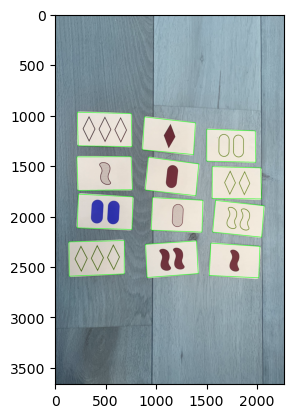

In [125]:
plt.imshow(orig_image)

In [122]:
print(f"{len(card_images)} were detected in the image")

12 were detected in the image


In [129]:
cv2.imwrite("highlighted_image.png", orig_image)

True

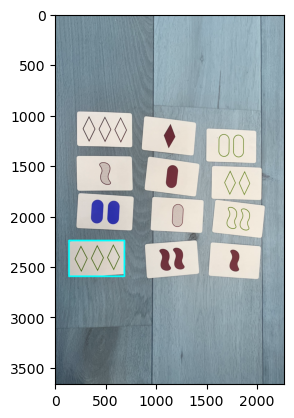

In [139]:
# highlight a specific card

random_index = 2

image = cv2.imread(image_path)

selected_card_images = card_images[random_index]
selected_card_position = card_positions[random_index]
x, y, w, h = selected_card_position

result = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 255), 15)

plt.imshow(result)

# Classifier

In [140]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

In [159]:
import time
import copy

In [143]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resizing to 224x224 for models like ResNet
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

In [150]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = self._find_classes()
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        
        self._load_dataset()

    def _find_classes(self):
        classes = []
        for root, _, _ in os.walk(self.root_dir):
            if root == self.root_dir:
                continue
            class_name = os.path.relpath(root, self.root_dir).replace(os.sep, ' ')
            if len(class_name.split()) == 4:  # Ensure class names have exactly four words
                classes.append(class_name)
        return sorted(classes)

    def _load_dataset(self):
        for root, _, files in os.walk(self.root_dir):
            if root == self.root_dir:
                continue
            class_name = os.path.relpath(root, self.root_dir).replace(os.sep, ' ')
            if len(class_name.split()) == 4:  # Ensure class names have exactly four words
                label = self.class_to_idx[class_name]
                for file in files:
                    if file.endswith(('png', 'jpg', 'jpeg')):
                        self.image_paths.append(os.path.join(root, file))
                        self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [155]:
data_dir = "dataset/"

full_dataset = CustomImageDataset(data_dir, transform=transform)

train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

class_names = full_dataset.classes
print(f"Classes: {class_names}")
print(f"There are {len(class_names)} classes.")

Classes: ['one green diamond open', 'one green diamond solid', 'one green diamond striped', 'one green oval open', 'one green oval solid', 'one green oval striped', 'one green squiggle open', 'one green squiggle solid', 'one green squiggle striped', 'one purple diamond open', 'one purple diamond solid', 'one purple diamond striped', 'one purple oval open', 'one purple oval solid', 'one purple oval striped', 'one purple squiggle open', 'one purple squiggle solid', 'one purple squiggle striped', 'one red diamond open', 'one red diamond solid', 'one red diamond striped', 'one red oval open', 'one red oval solid', 'one red oval striped', 'one red squiggle open', 'one red squiggle solid', 'one red squiggle striped', 'two green diamond open', 'two green diamond solid', 'two green diamond striped', 'two green oval open', 'two green oval solid', 'two green oval striped', 'two green squiggle open', 'two green squiggle solid', 'two green squiggle striped', 'two purple diamond open', 'two purple 

In [157]:
model = models.resnet50(pretrained=True)

# modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 81)

/Users/vivianamarquez/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vivianamarquez/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [158]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

print(device)

mps


In [163]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).item()  # Convert to float and get item

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)  # Ensure float32

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [164]:
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

In [165]:
model = train_model(model, dataloaders, criterion, optimizer, num_epochs=25)

Epoch 0/24
----------
train Loss: 2.6447 Acc: 0.5148
val Loss: 2.0443 Acc: 0.6221

Epoch 1/24
----------
train Loss: 1.4483 Acc: 0.7806
val Loss: 1.0107 Acc: 0.8458

Epoch 2/24
----------
train Loss: 0.7657 Acc: 0.9228
val Loss: 0.4251 Acc: 0.9794

Epoch 3/24
----------
train Loss: 0.4457 Acc: 0.9781
val Loss: 0.2218 Acc: 1.0000

Epoch 4/24
----------
train Loss: 0.2907 Acc: 0.9884
val Loss: 0.1523 Acc: 0.9949

Epoch 5/24
----------
train Loss: 0.1974 Acc: 0.9961
val Loss: 0.0944 Acc: 1.0000

Epoch 6/24
----------
train Loss: 0.1537 Acc: 0.9981
val Loss: 0.0648 Acc: 1.0000

Epoch 7/24
----------
train Loss: 0.1235 Acc: 0.9974
val Loss: 0.0488 Acc: 1.0000

Epoch 8/24
----------
train Loss: 0.1079 Acc: 0.9974
val Loss: 0.0349 Acc: 1.0000

Epoch 9/24
----------
train Loss: 0.0868 Acc: 0.9968
val Loss: 0.0282 Acc: 1.0000

Epoch 10/24
----------
train Loss: 0.0752 Acc: 0.9968
val Loss: 0.0252 Acc: 1.0000

Epoch 11/24
----------
train Loss: 0.0592 Acc: 0.9981
val Loss: 0.0222 Acc: 1.0000

Ep

In [166]:
torch.save(model.state_dict(), 'model.pth')

# Predicting

In [167]:
import torch
from torchvision import models

In [168]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [169]:
# Load the model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 81)  # Assuming 81 classes

# Move the model to the MPS device if available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)
print(device)

# Load the saved model weights
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode

/Users/vivianamarquez/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vivianamarquez/anaconda3/envs/pytorch_env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


mps


/var/folders/xm/mdklpdgs63zdhm8zvfg_l6g00000gn/T/ipykernel_61495/2498431577.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [170]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to 224x224 for models like ResNet
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

extracted_cards_dir = "extracted_cards"

# Load class names
class_names = full_dataset.classes

In [171]:
def predict_and_display(model, image_path, transform, class_names):
    image = Image.open(image_path).convert("RGB")
    image_transformed = transform(image).unsqueeze(0)  # Add batch dimension
    image_transformed = image_transformed.to(device)

    with torch.no_grad():
        outputs = model(image_transformed)
        _, preds = torch.max(outputs, 1)
        predicted_label = class_names[preds.item()]

    # Display the image and prediction
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

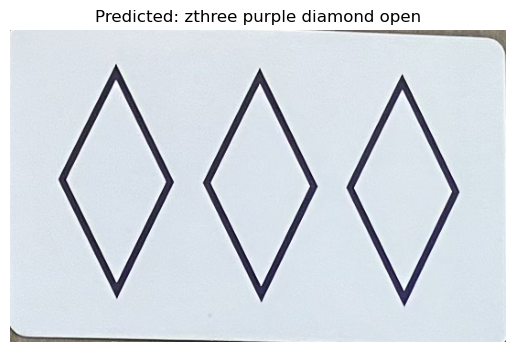

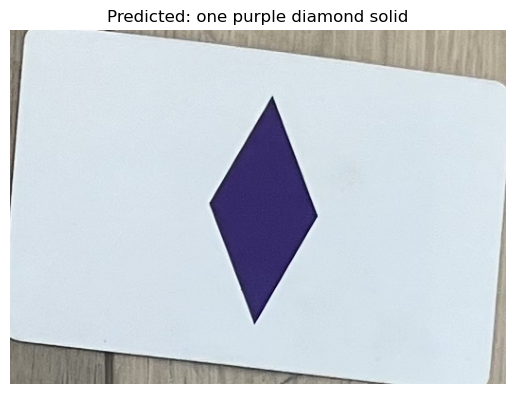

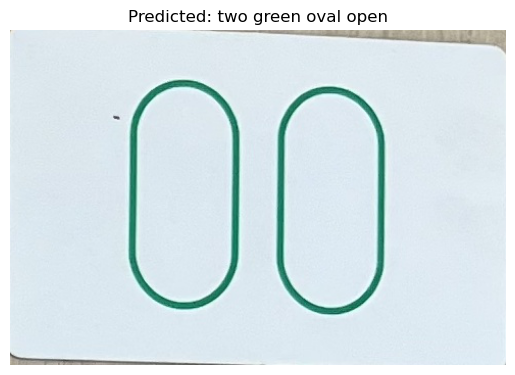

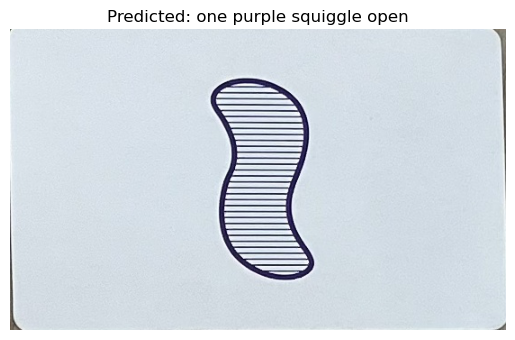

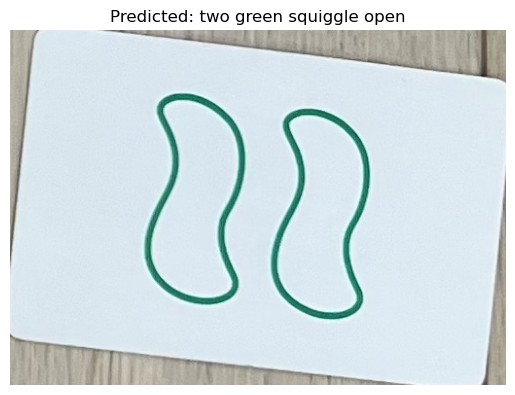

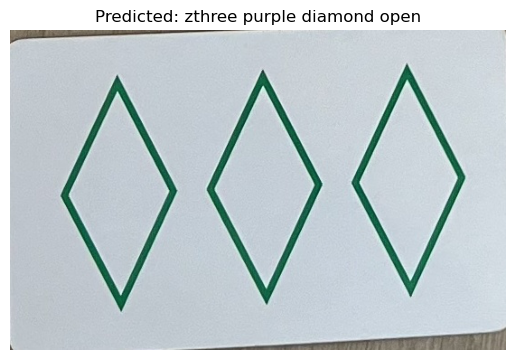

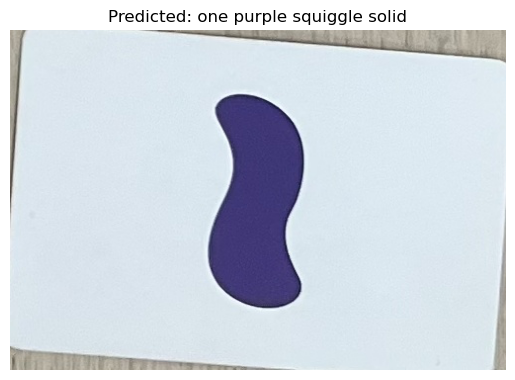

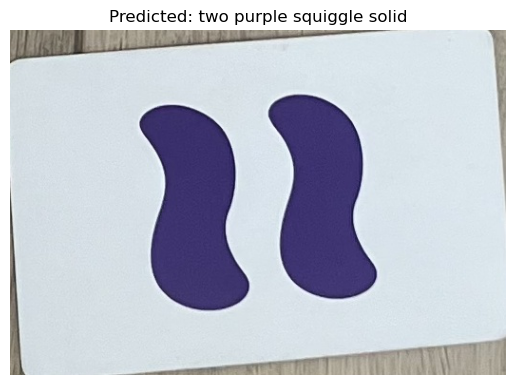

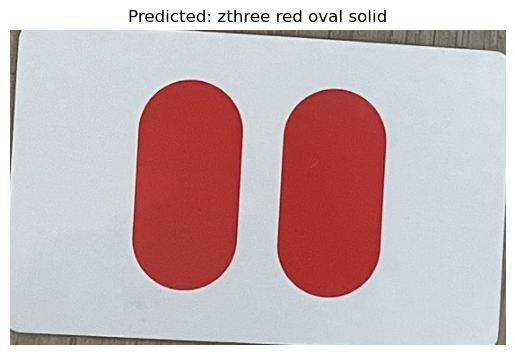

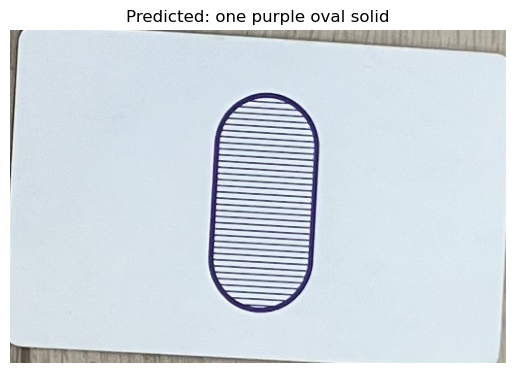

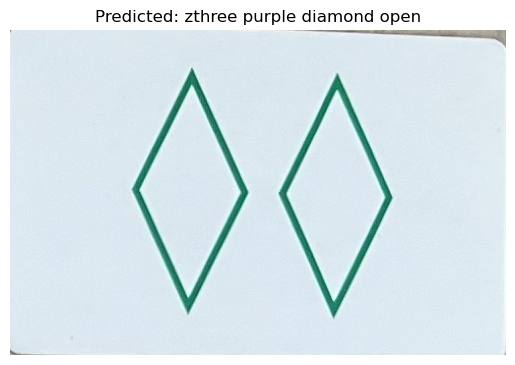

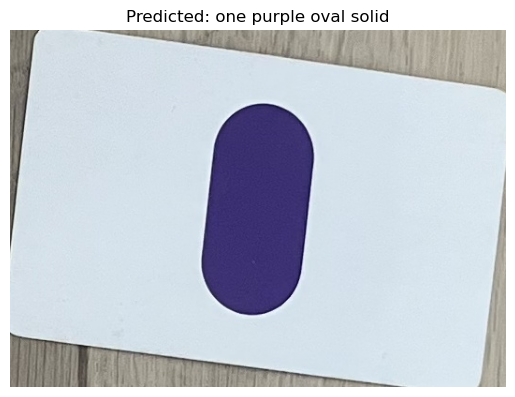

In [172]:
for img_file in os.listdir(extracted_cards_dir):
    img_path = os.path.join(extracted_cards_dir, img_file)
    if img_path.endswith(('png', 'jpg', 'jpeg')):
        predict_and_display(model, img_path, transform, class_names)